# L10. Asset pricing model:
    1. Capital asset pricing model (CAPM)
    2. Fama-French three factors model

## 1. Capital asset pricing model (CAPM)

The capital asset pricing model (CAPM) of William Sharpe (1964) and John Lintner (1965) marks the birth of asset pricing theory (resulting in a Nobel Prize for Sharpe in 1990).

Sharpe argues that any individual investment decision contains two types of risk:

- **Systematic Risk**: These are general risks of the market i.e. the risks which are independent of any specific investment decision. Systematic risk cannot be reduced or mitigated by diversification. 

- **Unsystematic Risk**: This represents ‘specific risks’ i.e. the risk that relates to an individual stock.

Modern portfolio theory advocates the idea that specific risk (unsystematic risk) can be reduced or mitigated by diversification of a portfolio. However, diversification will not solve the problem of systematic risk i.e. even a portfolio holding all the shares in a stock market cannot fully eliminate that risk. Therefore, when calculating a reasonable rate of return, the assessment and measurement of the systematic risk is extremely important.


CAPM provides a way to measure this systematic risk. Sharpe argued that the return on an individual investment/stock, or a portfolio of investments/stocks, should be equal to its cost of capital. The formula remains for CAPM therefore describes the relationship between risk and expected return.

### The CAPM Formula
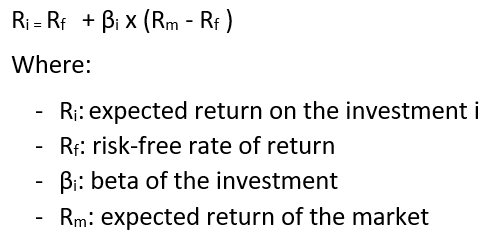


Beta is calculated as:

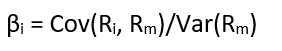

A nice visualisation of CAPM is as follow:
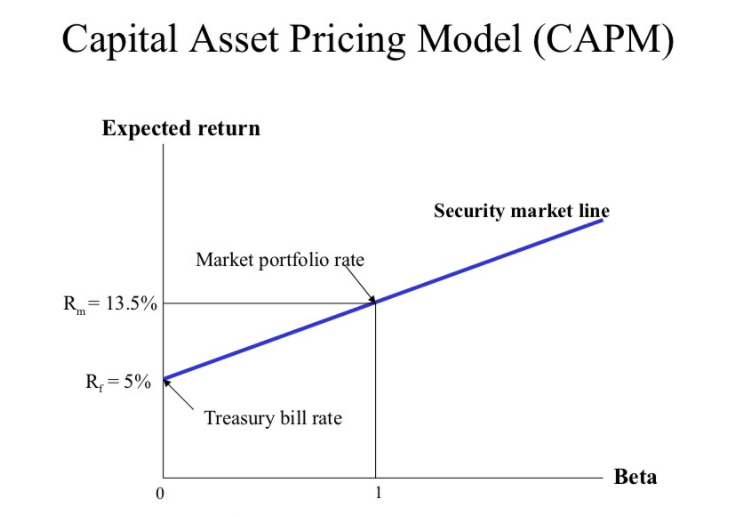

The Security Market Line (SML) depicts the different levels of market risk of various marketable assets plotted against the expected return line at any given point in time.


### Simple demonstration of CAPM without risk-free rate

In [1]:
# load packages/libraries
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Define the ticker list
tickers_list = ['MSFT', '^GSPC',] 
# set start and end date:
start = dt.datetime(2018,1,1)
end = dt.datetime(2019,12,31)

# Create placeholder for data
data = pd.DataFrame() 

# Fetch the data
for ticker in tickers_list:
    df = pdr.get_data_yahoo(ticker, start, end)
    df['ticker'] = ticker
    data = data.append(df)

print(data)

                   High          Low         Open        Close        Volume  \
Date                                                                           
2018-01-02    86.309998    85.500000    86.129997    85.949997  2.248380e+07   
2018-01-03    86.510002    85.970001    86.059998    86.349998  2.606140e+07   
2018-01-04    87.660004    86.570000    86.589996    87.110001  2.191200e+07   
2018-01-05    88.410004    87.430000    87.660004    88.190002  2.340710e+07   
2018-01-08    88.580002    87.599998    88.199997    88.279999  2.211300e+07   
...                 ...          ...          ...          ...           ...   
2019-12-24  3226.429932  3220.510010  3225.449951  3223.379883  1.296530e+09   
2019-12-26  3240.080078  3227.199951  3227.199951  3239.909912  2.164540e+09   
2019-12-27  3247.929932  3234.370117  3247.229980  3240.020020  2.429150e+09   
2019-12-30  3240.919922  3216.570068  3240.090088  3221.290039  3.021720e+09   
2019-12-31  3231.719971  3212.030029  32

The Adjusted Close column is the most important. It is normalized for stock splits, dividends, and other corporate actions, and is a true reflection of the return of the stock over time. You will be using the adjusted close price to calculate the returns of the stock in this exercise.

In [3]:
data = data.pivot(columns='ticker', values='Adj Close')
data

ticker,MSFT,^GSPC
Date,,
2018-01-02,80.940376,2695.810059
2018-01-03,81.317078,2713.060059
2018-01-04,82.032776,2723.989990
2018-01-05,83.049828,2743.149902
2018-01-08,83.134590,2747.709961
...,...,...
2019-12-24,153.002075,3223.379883
2019-12-26,154.256195,3239.909912
2019-12-27,154.538132,3240.020020


In [4]:
# rename column ^GSPC to SP500:
data.rename(columns = {'^GSPC': 'SP500'}, inplace = True)
data

ticker,MSFT,SP500
Date,,
2018-01-02,80.940376,2695.810059
2018-01-03,81.317078,2713.060059
2018-01-04,82.032776,2723.989990
2018-01-05,83.049828,2743.149902
2018-01-08,83.134590,2747.709961
...,...,...
2019-12-24,153.002075,3223.379883
2019-12-26,154.256195,3239.909912
2019-12-27,154.538132,3240.020020


In [5]:
# generate log return data:
log_returns = np.log(data/data.shift())
log_returns = log_returns.dropna()
log_returns

# log_returns = log_returns[1:]

ticker,MSFT,SP500
Date,,
2018-01-03,0.004643,0.006378
2018-01-04,0.008763,0.004021
2018-01-05,0.012322,0.007009
2018-01-08,0.001020,0.001661
2018-01-09,-0.000680,0.001302
...,...,...
2019-12-24,-0.000191,-0.000195
2019-12-26,0.008163,0.005115
2019-12-27,0.001826,0.000034


In [6]:
# check correlation between microsoft and the SP500:
log_returns.corr()

ticker,MSFT,SP500
ticker,,
MSFT,1.000000,0.853662
SP500,0.853662,1.000000


We will calculate beta using the formular: 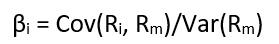

In [7]:
# generate covariance:
cov = log_returns.cov()
cov

ticker,MSFT,SP500
ticker,,
MSFT,0.000236,0.000124
SP500,0.000124,0.000089


In [8]:
# generate variance of SP500
var = log_returns['SP500'].var()
var

8.918141323280332e-05

In [9]:
# calculate beta
beta_microsoft = cov.loc['MSFT', 'SP500']/var
beta_microsoft

1.389329255645926

Confirm value of beta of Microsoft through regression:

In [10]:
import statsmodels.formula.api as smf
formula = 'MSFT ~ SP500'
est_capm = smf.ols(formula, log_returns).fit()
print(est_capm.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1343.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          9.28e-144
Time:                        11:45:04   Log-Likelihood:                 1711.7
No. Observations:                 502   AIC:                            -3419.
Df Residuals:                     500   BIC:                            -3411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.000      2.156      0.0

### Full demonstration of CAPM (taking risk-free rate into consideration)

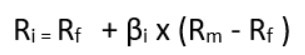

We will use data of risk free rate and market risk premium downloaded from Professor Kenneth French website which is available at: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

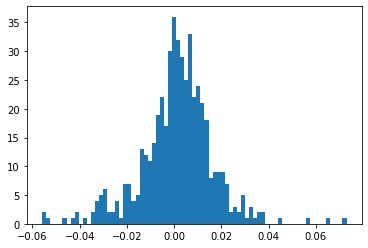

In [11]:
# check histogram log return of microsoft
plt.hist(log_returns['MSFT'].dropna(), bins = 75, density = False)
plt.show()

In [12]:
factors = pdr.get_data_famafrench('F-F_Research_Data_Factors_Daily', start, end)[0]
factors = factors[1:]
factors

,Mkt-RF,SMB,HML,RF
Date,,,,
2018-01-03,0.59,-0.39,-0.19,0.006
2018-01-04,0.42,-0.26,0.25,0.006
2018-01-05,0.66,-0.35,-0.25,0.006
2018-01-08,0.19,-0.15,0.04,0.006
2018-01-09,0.15,-0.35,-0.04,0.006
...,...,...,...,...
2019-12-24,0.01,0.39,-0.01,0.007
2019-12-26,0.48,-0.54,0.00,0.007
2019-12-27,-0.10,-0.53,-0.07,0.007


In [13]:
print(log_returns.shape)
print(factors.shape)

(502, 2)
(502, 4)


In [14]:
# merge data:
merge = pd.merge(log_returns, factors, how = 'left', on = ['Date'], )
merge

,MSFT,SP500,Mkt-RF,SMB,HML,RF
Date,,,,,,
2018-01-03,0.004643,0.006378,0.59,-0.39,-0.19,0.006
2018-01-04,0.008763,0.004021,0.42,-0.26,0.25,0.006
2018-01-05,0.012322,0.007009,0.66,-0.35,-0.25,0.006
2018-01-08,0.001020,0.001661,0.19,-0.15,0.04,0.006
2018-01-09,-0.000680,0.001302,0.15,-0.35,-0.04,0.006
...,...,...,...,...,...,...
2019-12-24,-0.000191,-0.000195,0.01,0.39,-0.01,0.007
2019-12-26,0.008163,0.005115,0.48,-0.54,0.00,0.007
2019-12-27,0.001826,0.000034,-0.10,-0.53,-0.07,0.007


In [15]:
# divide value of 03 columns by 100 as they are expressed in percentage:
merge[['Mkt-RF','SMB', 'HML', 'RF']] = merge[['Mkt-RF','SMB', 'HML', 'RF']]/100

# rename column:
merge.rename(columns = {'Mkt-RF': 'Mkt_RF'}, inplace = True)

merge

,MSFT,SP500,Mkt_RF,SMB,HML,RF
Date,,,,,,
2018-01-03,0.004643,0.006378,0.0059,-0.0039,-0.0019,0.00006
2018-01-04,0.008763,0.004021,0.0042,-0.0026,0.0025,0.00006
2018-01-05,0.012322,0.007009,0.0066,-0.0035,-0.0025,0.00006
2018-01-08,0.001020,0.001661,0.0019,-0.0015,0.0004,0.00006
2018-01-09,-0.000680,0.001302,0.0015,-0.0035,-0.0004,0.00006
...,...,...,...,...,...,...
2019-12-24,-0.000191,-0.000195,0.0001,0.0039,-0.0001,0.00007
2019-12-26,0.008163,0.005115,0.0048,-0.0054,0.0000,0.00007
2019-12-27,0.001826,0.000034,-0.0010,-0.0053,-0.0007,0.00007


In [16]:
# generate microsoft excess return:
merge['excess_return'] = merge['MSFT'] - merge['RF']
merge

,MSFT,SP500,Mkt_RF,SMB,HML,RF,excess_return
Date,,,,,,,
2018-01-03,0.004643,0.006378,0.0059,-0.0039,-0.0019,0.00006,0.004583
2018-01-04,0.008763,0.004021,0.0042,-0.0026,0.0025,0.00006,0.008703
2018-01-05,0.012322,0.007009,0.0066,-0.0035,-0.0025,0.00006,0.012262
2018-01-08,0.001020,0.001661,0.0019,-0.0015,0.0004,0.00006,0.000960
2018-01-09,-0.000680,0.001302,0.0015,-0.0035,-0.0004,0.00006,-0.000740
...,...,...,...,...,...,...,...
2019-12-24,-0.000191,-0.000195,0.0001,0.0039,-0.0001,0.00007,-0.000261
2019-12-26,0.008163,0.005115,0.0048,-0.0054,0.0000,0.00007,0.008093
2019-12-27,0.001826,0.000034,-0.0010,-0.0053,-0.0007,0.00007,0.001756


#### CAPM Regression

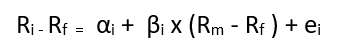

Regression visualisation is as follow:

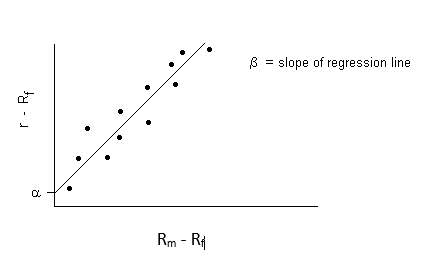

Note that, except for alpha, this is the equation for CAPM - that is, the beta you get from Sharpe's derivation of equilibrium prices is essentially the same beta you get from doing a least-squares regression against the data.

Beta is the slope of this line. Alpha, the vertical intercept, tells you how much better/worse the investment did than CAPM predicted.


In [17]:
import statsmodels.formula.api as smf
formula = 'excess_return ~ Mkt_RF'
est_capm1 = smf.ols(formula, merge).fit()
print(est_capm1.summary())


                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1286.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          2.59e-140
Time:                        11:45:08   Log-Likelihood:                 1703.7
No. Observations:                 502   AIC:                            -3403.
Df Residuals:                     500   BIC:                            -3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0007      0.000      1.884      0.0

In [18]:
# predict yhat
yhat = est_capm1.fittedvalues
print(yhat)

Date
2018-01-03    0.008650
2018-01-04    0.006355
2018-01-05    0.009595
2018-01-08    0.003250
2018-01-09    0.002710
                ...   
2019-12-24    0.000820
2019-12-26    0.007165
2019-12-27   -0.000665
2019-12-30   -0.007010
2019-12-31    0.004465
Length: 502, dtype: float64


### Visualise the regression result

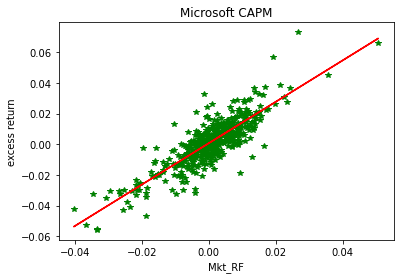

In [19]:
plt.figure()
plt.plot(merge['Mkt_RF'], merge['excess_return'], 'g*')
plt.plot(merge['Mkt_RF'], yhat, 'r')
plt.xlabel('Mkt_RF')
plt.ylabel('excess return')
plt.title('Microsoft CAPM')
plt.show()

Another way to run regression is to used statsmodels.api

In [20]:
import statsmodels.api as sm

# construct independent variable:
X = merge['Mkt_RF']

# construct dependent variable:
y = merge['excess_return']

# add constant:
X1 = sm.add_constant(X)

# run regression:
est_capm_1 = sm.OLS(y,X1).fit()

# output results:
print(est_capm_1.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1286.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          2.59e-140
Time:                        11:45:10   Log-Likelihood:                 1703.7
No. Observations:                 502   AIC:                            -3403.
Df Residuals:                     500   BIC:                            -3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      1.884      0.0

In [21]:
# predict yhat:
yhat1 = est_capm_1._results.predict(X1)

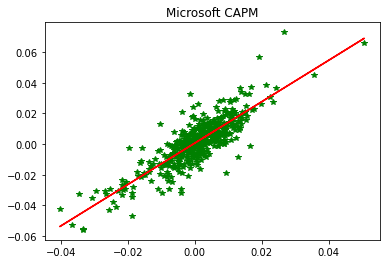

In [22]:
# visualise the result
plt.figure()
plt.plot(X, y, 'g*')
plt.plot(X, yhat1, 'r')
plt.title('Microsoft CAPM')
plt.show()

### Hypothesis testing

In [23]:
# formulate the null hypothesis01:
hypothesis01 = 'Intercept=0'

# t test:
est_capm1.t_test(hypothesis01)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0007      0.000      1.884      0.060   -2.95e-05       0.001

## Fama-French 3 factors model

Developed in 1992 by University of Chicago professors Eugene Fama and Kenneth French, it is based on the observation that value shares tend to outperform growth shares and small-cap shares tend to outperform large-cap shares. Jumping off those observations the two economists developed their three-factor model as an expansion of the Capital Asset Pricing model (CAPM). Rather than just gauge market risk as the CAPM does, the Fama-French Three Factor model adds **value risk** and **size risk** to the calculation.

The Fama-French Three Factor model calculates an investment’s likely rate of return based on three elements: 
- overall market risk, 
- the degree to which small companies outperform large companies and 
- the degree to which high-value companies outperform low-value companies.

Fama-French 3 factors formula:

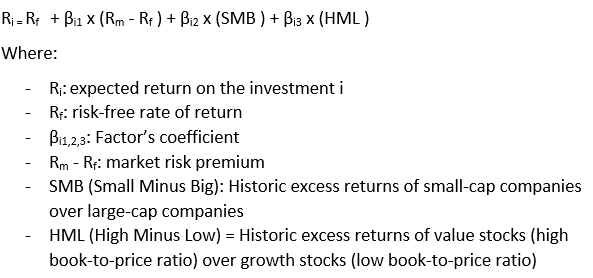


### Fama-French regression

The regression equation can be written as:


In [24]:
formula = 'excess_return ~ Mkt_RF + SMB + HML'
est_ff3f = smf.ols(formula, merge).fit()
print(est_ff3f.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     624.6
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          2.57e-168
Time:                        11:45:10   Log-Likelihood:                 1776.0
No. Observations:                 502   AIC:                            -3544.
Df Residuals:                     498   BIC:                            -3527.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.000      1.268      0.2

### Hypothesis testing

In [25]:
#hypothesis01 = 'Intercept=0'
hypothesis01 = 'Mkt_RF=0'
est_ff3f.t_test(hypothesis01)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.2816      0.034     38.064      0.000       1.215       1.348

In [26]:
hypothesis02 = 'Mkt_RF=SMB=HML=0'
est_ff3f.f_test(hypothesis02)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=624.6446852219747, p=2.5693348455230493e-168, df_denom=498, df_num=3>